### Data Analytics Online Career Accelerator
# Course 301: Advanced Analytics for Organisational Impact

## Practical activity: Creating a decision tree

**Scenario**

You’ve learned how to build classification and regression decision trees and how to test the accuracy of their predictions. Now it’s time to apply your learning in a practical activity. You will use the same data sets to assist Shen Lee in building a decision tree and compare the output to the binary logistic regression (BLR) and support vector machine (SVM) models you built with her previously.

Shen Lee, a senior manager at Westside Hospital, wants to understand if breast cancer can be predicted based on some kind of detection measurement. As part of her classification predictive analysis, Shen has already built BLR and SVM models, but she needs more models to compare in order to be confident about the accuracy of the predictions she hopes to generate. 

Now, Shen uses a decision tree, specifically a classification decision tree (due to the nature of her aim of predicting positive breast cancer cases from the available data), which can then be compared to the BLR and SVM model. 
Can you help Shen to build a decision tree and compare the results with the BLR and SVM models? 

## 1. Prepare your workstation

In [1]:
# Import all the necessary packages.
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Read the data file with Pandas.
df = pd.read_csv('breast_cancer_data.csv', 
                 index_col='id') 

# Sense-check the data.
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 2. Explore the data set

In [2]:
# Determine the number of null values.
df.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [3]:
# Determine the descriptive statistics.
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## 3. Manipulate the data

In [4]:
# All values are null. We'll drop them.
df.drop(labels='Unnamed: 32', axis=1, inplace=True)

# View DataFrame.
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Determine if data set is balanced.
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## 4. Prepare the data

In [6]:
# Import all the necessary packages:
import imblearn
import statsmodels.api as sm 
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split 

# Set the variables:
X_data = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [7]:
# Normalise the data with the min-max feature scale.
X = (X_data -np.min(X_data))/(np.max(X_data)-np.min(X_data)).values

# View the values.
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
842517,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
84300903,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
84348301,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
84358402,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [8]:
# Apply SMOTE class as the target variable is not balanced.
os = SMOTE(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

# Specify the new data sets.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 
os_data_y = pd.DataFrame(data = os_data_y, columns = ['diagnosis'])

# View DataFrame.
print(os_data_X.head())
os_data_y.head()

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.319892      0.277308        0.306337   0.187275         0.242033   
1     0.302381      0.225905        0.292378   0.173913         0.167193   
2     0.364854      0.144403        0.376132   0.217434         0.455629   
3     0.280610      0.223876        0.267708   0.158176         0.241762   
4     0.314213      0.457220        0.299910   0.182269         0.359574   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.136127        0.067502             0.066054       0.208586   
1          0.165235        0.189597             0.139165       0.182828   
2          0.503711        0.339738             0.313121       0.518182   
3          0.105147        0.090745             0.118141       0.388384   
4          0.147506        0.069681             0.121421       0.305051   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

,diagnosis
0,B
1,B
2,B
3,B
4,B


In [9]:
# Determine if data set is balanced.
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## 5. Create the decision tree model

In [10]:
# Import necessary package.
from sklearn.tree import DecisionTreeClassifier 

# Create a Decision Tree classifer object.
dtc = DecisionTreeClassifier(criterion='gini',
                             max_depth=4,
                             random_state=42)

# Train the Decision Tree Classifer.
dtc = dtc.fit(X, y)

# Predict the response for the test data set.
y_pred = dtc.predict(X_test)

## 6. Calculate accuracy of model

In [11]:
# Import necessary packages.
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

# Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_pred)

confusion = pd.DataFrame(confusion_matrix, index=['is_healthy', 'is_cancer'],
                         columns=['predicted_healthy', 'predicted_cancer'])

# View the output.
confusion

,predicted_healthy,predicted_cancer
is_healthy,108,0
is_cancer,1,62


<AxesSubplot:>

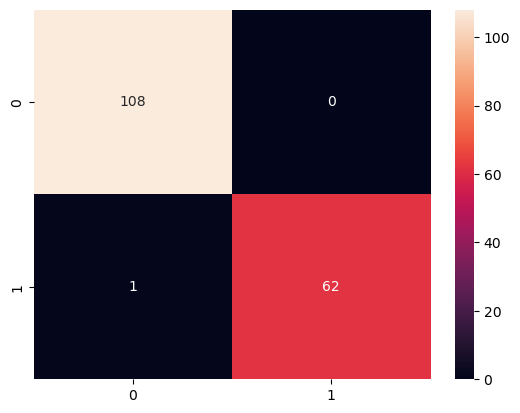

In [12]:
# import Seaborn library.
import seaborn as sns

# Plot the confusion_matrix.
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [13]:
# Print the accuracy and classification report.
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9941520467836257
              precision    recall  f1-score   support

           B       0.99      1.00      1.00       108
           M       1.00      0.98      0.99        63

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



## 7. Visualise the model

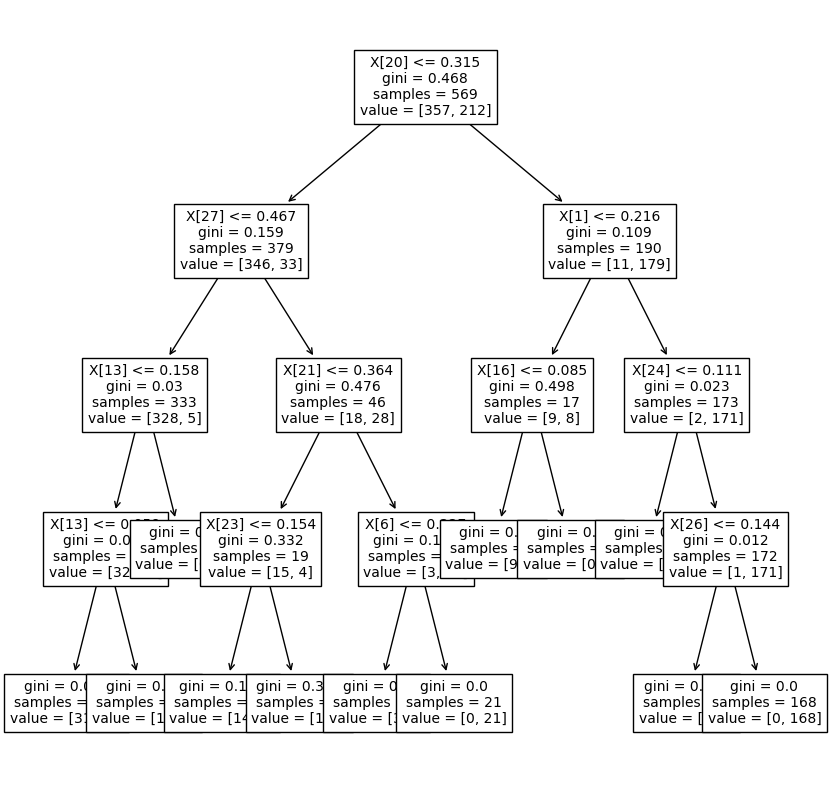

In [14]:
# Import matplotlib to create a visualisation 
# and the tree package from sklearn:
import matplotlib.pyplot as plt 
from sklearn import tree

# Plot the decision tree to create the visualisation:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dtc, fontsize=10)

# Print the plot with plt.show().
plt.show() 